In [1]:
from bioinfokit.analys import stat
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from patsy import dmatrices
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
import sklearn.metrics
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import normal_ad
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from statsmodels.stats.outliers_influence import variance_inflation_factor
plt.style.use('seaborn')
plt.rcParams["figure.figsize"] = (16, 8)

The Diamonds dataset https://www.kaggle.com/datasets/shivam2503/diamonds<br>
The dataset contains data on 53,940 round-cut diamonds with 10 features:
1. carat - weight of the diamond (numerical data),
2. cut - cut quality of the cut (Fair, Good, Very Good, Premium, Ideal) (categorical data),
3. color - color diamond colour, from J (worst) to D (best) (caegorical data),
4. clarity - clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)) (categorical data),
5. depth - total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)(numerical data),
6. table - table width of top of diamond relative to widest point (43--95) (numerical data),
7. price - price in US dollars,(numerical data),
8. x - length in mm (numerical data), 
9. y - width in mm (numerical data),
10. z - depht in mm (numerical data).

In [2]:
data_frame = pd.read_csv('./Diamonds Prices2022.csv',index_col=0)
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53943 entries, 1 to 53943
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53943 non-null  float64
 1   cut      53943 non-null  object 
 2   color    53943 non-null  object 
 3   clarity  53943 non-null  object 
 4   depth    53943 non-null  float64
 5   table    53943 non-null  float64
 6   price    53943 non-null  int64  
 7   x        53943 non-null  float64
 8   y        53943 non-null  float64
 9   z        53943 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [3]:
#first look at the data frame
data_frame

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64
53941,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53942,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43


### Carat

In [4]:
data_frame['carat'].describe()

count    53943.000000
mean         0.797935
std          0.473999
min          0.200000
25%          0.400000
50%          0.700000
75%          1.040000
max          5.010000
Name: carat, dtype: float64

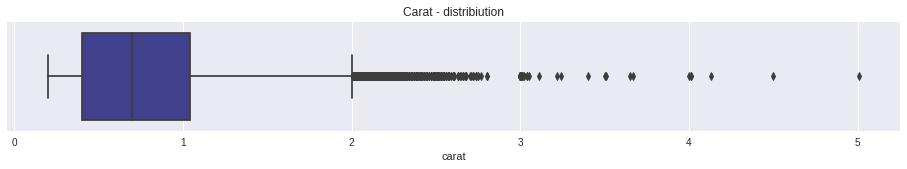

In [5]:
plt.figure(figsize=(16, 2))
sns.boxplot(x='carat',data=data_frame, color='#333399')
plt.title("Carat - distribiution")
plt.show()

-most diamonds are 0.4 - 1.04 carats,<br>
-the median of the carat weight data is 0.7 carats,<br>
-the mean is 0.79,<br>
-there are many outlier observations.

### Price

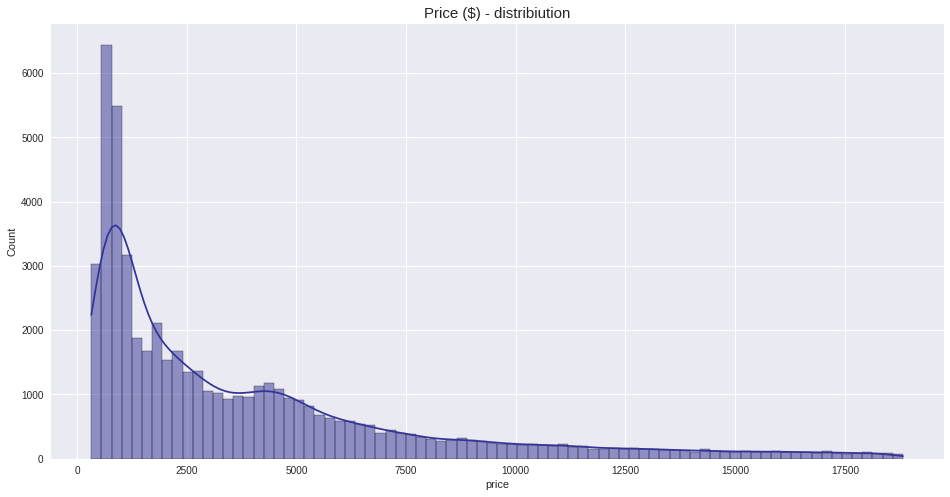

In [6]:
sns.histplot(x='price',data=data_frame, kde=True, color='#333399')
plt.title('Price ($) - distribiution', size=15)
plt.show()

In [7]:
data_frame['price'].describe()

count    53943.000000
mean      3932.734294
std       3989.338447
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.000000
max      18823.000000
Name: price, dtype: float64

The distribution of the diamond price is right-skewed - we have the peak of the results on the left. The distribution is platykurtic - there are many outlier observations.<br>
- the lowest price \\$326<br>
- the highest price \\$18,823 <br>
- the average price \\$3932  <br>
- he median $2401.

### Cut - prices by cuts, does the cut affect the price?

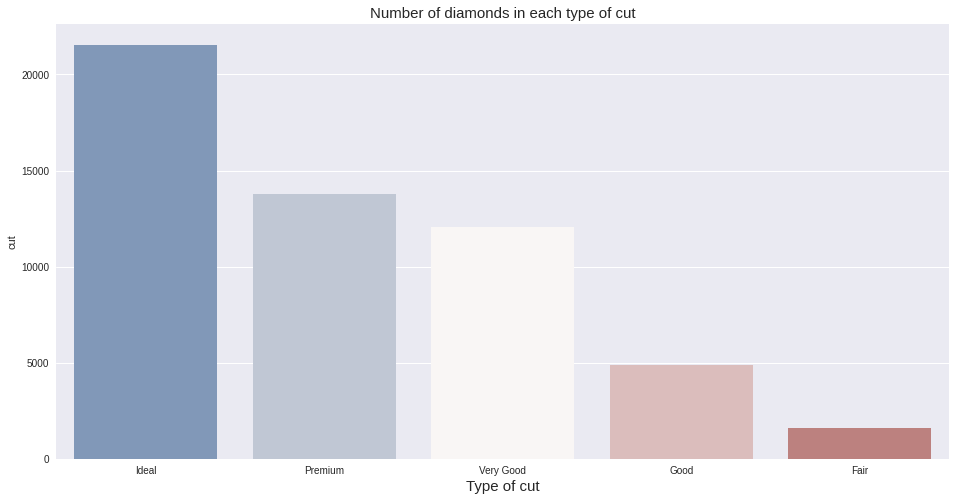

In [8]:
cuts = data_frame['cut'].value_counts()
cuts = cuts.reset_index()
sns.barplot(data=cuts, x='index', y='cut', palette ="vlag")
plt.xlabel('Type of cut', size=15)
plt.title('Number of diamonds in each type of cut', size=15)
plt.show()

In [9]:
cuts

,index,cut
0,Ideal,21551
1,Premium,13793
2,Very Good,12083
3,Good,4906
4,Fair,1610


The largest number of diamonds has the "Ideal" cut - 21,551, the least have the "Fair" cut - 1,610.

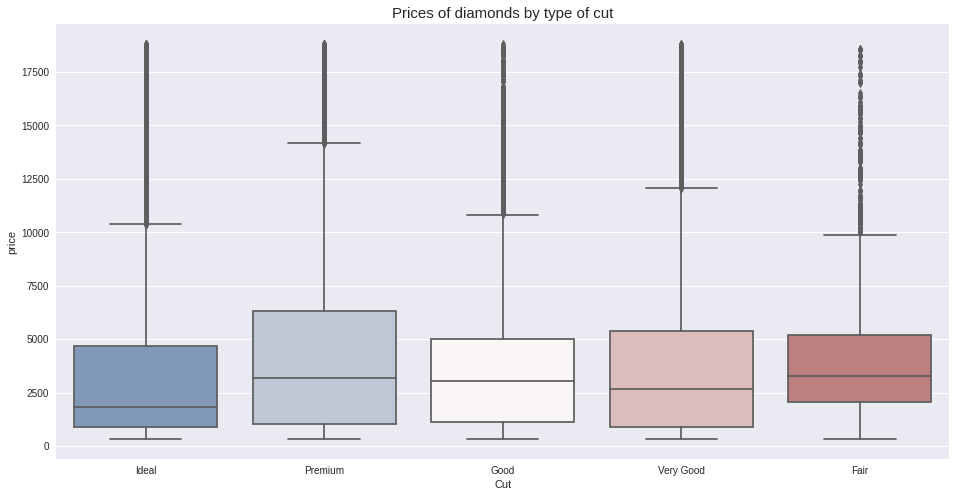

In [10]:
sns.boxplot(x='cut', y='price', data=data_frame, palette ="vlag")
plt.xlabel('Cut')
plt.title('Prices of diamonds by type of cut', size=15)
plt.show()

In [11]:
# perform ANOVA test to check if the means in all the groups are equal
alpha = 0.05
f, p = stats.f_oneway(data_frame.loc[data_frame['cut']=='Ideal','price'], data_frame.loc[data_frame['cut']=='Premium','price'],
                         data_frame.loc[data_frame['cut']=='Very Good','price'], data_frame.loc[data_frame['cut']=='Good','price'],
                         data_frame.loc[data_frame['cut']=='Fair','price'])
if p > alpha:
    print('The means of all the groups are equal')
else:
    print('At least one group mean that differs from the rest')
print('stat:',f, 'p-value:',p)

At least one group mean that differs from the rest
stat: 175.63263533586198 p-value: 9.410997495179044e-150


In [12]:
#perform the post-hoc test - Tukey to check the best group
data = data_frame[['cut', 'price']]
res = stat()
res.tukey_hsd(df=data, res_var='price', xfac_var='cut', 
              anova_model='price ~ C(cut)')
res.tukey_summary

/home/sylwia/anaconda3/envs/kurs/lib/python3.9/site-packages/bioinfokit/analys.py:365: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]


,group1,group2,Diff,Lower,Upper,q-value,p-value
0,Ideal,Premium,1126.450635,1008.548629,1244.352641,36.857463,0.001000
1,Ideal,Good,471.322481,300.281870,642.363093,10.630493,0.001000
2,Ideal,Very Good,524.116558,401.232772,647.000345,16.453859,0.001000
3,Ideal,Fair,901.215794,621.859521,1180.572067,12.445285,0.001000
4,Premium,Good,655.128153,475.389089,834.867218,14.061066,0.001000
5,Premium,Very Good,602.334076,467.605959,737.062194,17.247004,0.001000
6,Premium,Fair,225.234841,-59.530269,509.999951,3.051288,0.195985
7,Good,Very Good,52.794077,-130.251473,235.839627,1.112655,0.900000
8,Good,Fair,429.893312,119.337076,740.449548,5.340168,0.001499
9,Very Good,Fair,377.099235,90.235662,663.962809,5.071246,0.003100


In the box plot above we can see the distribution of prices by type of the cut, it seems that the most expensive diamonds are those with a "Premium" cut. The ANOVA test conducted confirmed this, that the average price in each cut group varies. The Tukey posthoc test made it possible to distinguish the averages, and so we learned that in the Premium and Fair groups the averages are not statistically different from each other and are the highest. Similarly, the Very Good and Good groups are not statistically different from each other. The lowest averages turned out to have diamonds of the "Ideal" cut.

### Color - does the color of a diamond affect its price?

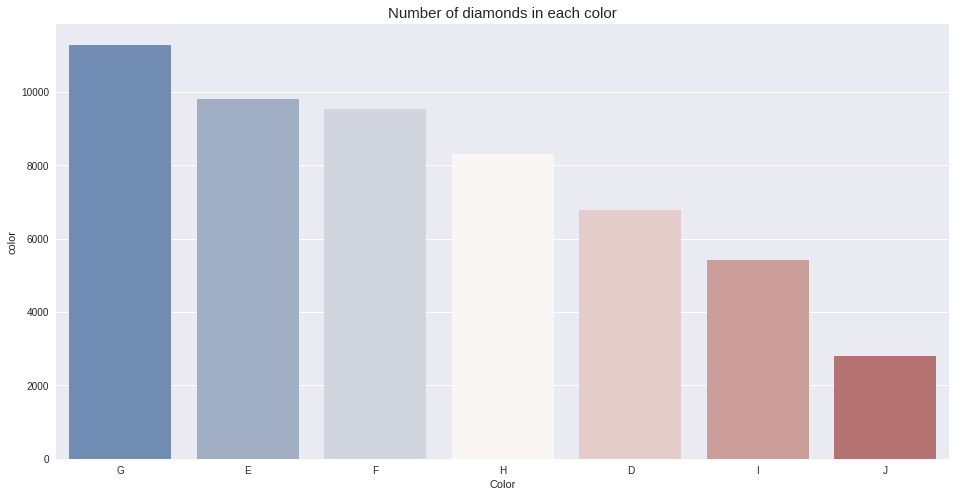

In [13]:
colors = data_frame['color'].value_counts()
colors = colors.reset_index()
sns.barplot(data=colors, x='index', y='color', palette ="vlag")
plt.xlabel('Color')
plt.title('Number of diamonds in each color', size=15)
plt.show()

In [14]:
colors

,index,color
0,G,11292
1,E,9799
2,F,9543
3,H,8304
4,D,6775
5,I,5422
6,J,2808


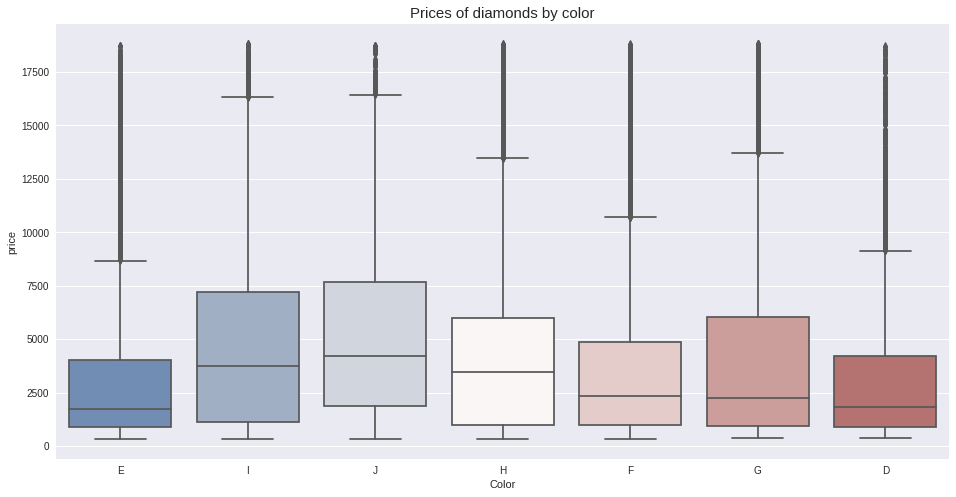

In [15]:
sns.boxplot(x='color', y='price', data=data_frame,palette ="vlag")
plt.xlabel('Color')
plt.title('Prices of diamonds by color', size=15)
plt.show()

In [16]:
# perform ANOVA test to check if the color of the diamond affects its price
alpha = 0.05
f, p = stats.f_oneway(data_frame.loc[data_frame['color']=='E','price'], data_frame.loc[data_frame['color']=='I','price'],
                         data_frame.loc[data_frame['color']=='J','price'], data_frame.loc[data_frame['color']=='H','price'],
                         data_frame.loc[data_frame['color']=='F','price'],data_frame.loc[data_frame['color']=='G','price'],
                         data_frame.loc[data_frame['color']=='D','price'])
if p > alpha:
    print('The means of all the groups are equal')
else:
    print('At least one group mean that differs from the rest')
print('stat:',f, 'p-value:',p)

At least one group mean that differs from the rest
stat: 290.254141558228 p-value: 0.0


In [17]:
#perform post-hoc test Tukey to check which group is the best
tukey_data = data_frame[['color', 'price']]
res = stat()
res.tukey_hsd(df=tukey_data, res_var='price', xfac_var='color', 
              anova_model='price ~ C(color)')
res.tukey_summary

/home/sylwia/anaconda3/envs/kurs/lib/python3.9/site-packages/bioinfokit/analys.py:365: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]


,group1,group2,Diff,Lower,Upper,q-value,p-value
0,E,I,2015.187843,1819.230557,2211.145129,42.880035,0.001000
1,E,J,2247.130909,1999.316300,2494.945518,37.809635,0.001000
2,E,H,1409.982085,1237.298448,1582.665721,34.045790,0.001000
3,E,F,648.097758,481.592555,814.602960,16.229821,0.001000
4,E,G,922.448560,762.609569,1082.287552,24.063591,0.001000
5,E,D,93.266985,-89.660346,276.194316,2.125937,0.715559
6,I,J,231.943066,-37.230289,501.116421,3.592943,0.144737
7,I,H,605.205758,403.062608,807.348908,12.483749,0.001000
8,I,F,1367.090085,1170.198752,1563.981419,28.951532,0.001000
9,I,G,1092.739283,901.452278,1284.026287,23.819470,0.001000


From the results of ANOVA test and later the post hoc test, we know that what color the diamond is affects its price. From the post hoc test, the colors for which the price was highest turned out to be colors I and J, followed by colors H, G, F, and finally the colors with the lowest price, which is not statistically different - E and D.

### Clarity

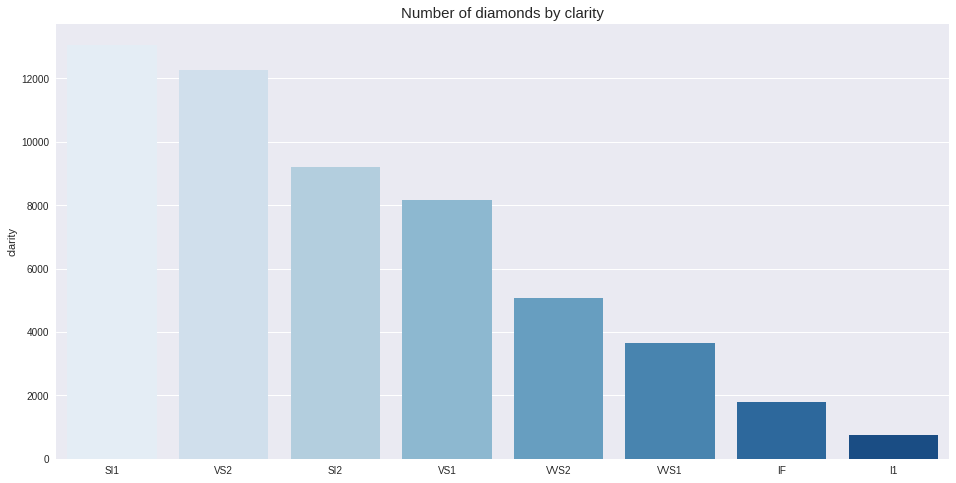

In [18]:
clarity = data_frame['clarity'].value_counts()
clarity = clarity.reset_index()
sns.barplot(data=clarity, x='index', y='clarity',palette ="Blues")
plt.xlabel(None)
plt.title('Number of diamonds by clarity', size=15)
plt.show()

The largest number of diamonds have the "SI1" clarity, the least have the "I1" clarity.

### Depth
Total depth percentage = z / mean(x, y) = 2 * z / (x + y)

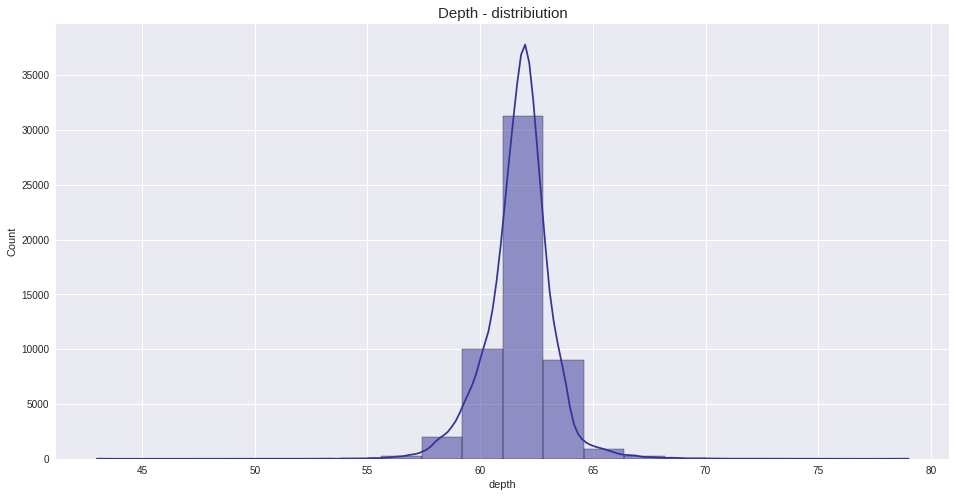

In [19]:
sns.histplot(x='depth',data=data_frame, bins=20, kde=True, color='#333399')
plt.title('Depth - distribiution', size=15)
plt.show()

In [20]:
data_frame['depth'].describe()

count    53943.000000
mean        61.749322
std          1.432626
min         43.000000
25%         61.000000
50%         61.800000
75%         62.500000
max         79.000000
Name: depth, dtype: float64

Depth values are in the 43-79 range, but most are in the 61-62 range.

### Table
Table width of top of diamond relative to widest point

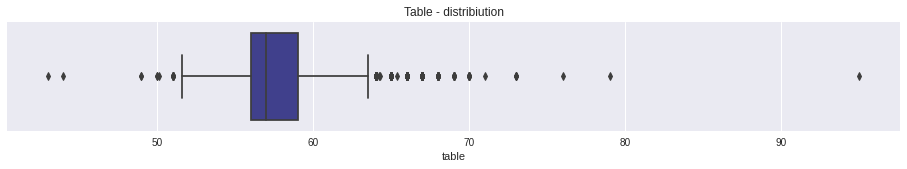

In [21]:
plt.figure(figsize=(16, 2))
sns.boxplot(x='table',data=data_frame, color='#333399')
plt.title("Table - distribiution")
plt.show()

In [22]:
data_frame['table'].describe()

count    53943.000000
mean        57.457251
std          2.234549
min         43.000000
25%         56.000000
50%         57.000000
75%         59.000000
max         95.000000
Name: table, dtype: float64

Table values are in the 43-95 range, but most are in the 56-59 range.

### Correlation

In [23]:
data_frame.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.028234,0.181602,0.921591,0.975093,0.951721,0.953387
depth,0.028234,1.000000,-0.295798,-0.010630,-0.025289,-0.029340,0.094927
table,0.181602,-0.295798,1.000000,0.127118,0.195333,0.183750,0.150915
price,0.921591,-0.010630,0.127118,1.000000,0.884433,0.865419,0.861249
x,0.975093,-0.025289,0.195333,0.884433,1.000000,0.974701,0.970771
y,0.951721,-0.029340,0.183750,0.865419,0.974701,1.000000,0.952005
z,0.953387,0.094927,0.150915,0.861249,0.970771,0.952005,1.000000


From the above table with the correlation between variables, we can read a very high correlation for the variable carat and price. And it is these two variables that I will use in the next part of this analysis, where I will create a linear regression model for these two variables, and then check whether all the assumptions are met. 

In [24]:
# Step 1 - create a linear regression model for the variables carat and price.

lin_X = data_frame[['carat']] 
lin_y = data_frame[['price']] #target variable

model = LinearRegression()
model.fit(lin_X, lin_y)

LinearRegression()

### Assumption 1. Linear relationship
We already know that there is a relationship between the variables carat and price, and this correlation is very high - 0.921591.
To check the assumption of a linear relationship for the two variables, it is enough to make a sccaterplot.

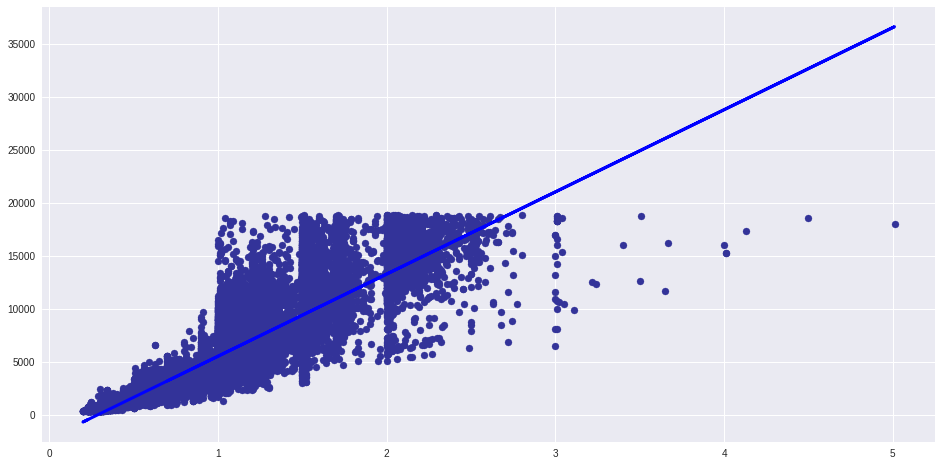

In [25]:
lin_y_pred = model.predict(lin_X)#predict
plt.scatter(lin_X, lin_y, color='#333399')
plt.plot(lin_X.values.flatten(), lin_y_pred.flatten(), color="b", linewidth=3)
plt.show()

In [26]:
#count a coefficient of determination
linear_r2 = model.score(lin_X, lin_y)
print('R^2: {0}'.format(linear_r2))

R^2: 0.8493304833200087


The scaterplot confirms the linear relationship, the coefficient of determination is also high.

In [27]:
#calculating The Mean Squared Error (MSE)
mse = sklearn.metrics.mean_squared_error(lin_y,lin_y_pred)  
mse

2397833.9727003295

### Assumption 2. The residuals are independent.

In [28]:
#calculate residuals
df_results = pd.DataFrame({'Actual': lin_y.values.flatten(), 'Predicted': lin_y_pred.flatten()})
df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])

In [29]:
#perform Durbin-Watson test to check if the assumption is met
durbinWatson = durbin_watson(df_results['Residuals'])
print('Durbin-Watson:', durbinWatson)

Durbin-Watson: 0.9908702335695819


In [30]:
if durbinWatson < 1.5:
    print('Autocorrelation positive')
elif durbinWatson > 2.5:
    print('Autocorrelation negative')
else:
    print('No autocorrelation')

Autocorrelation positive


To see if there is autocorrelation, I conducted the Durbin Watson test, for which test statistic results in the range of 1.5 to 2.5 are considered normal. Values below 1.5 and the closer they are to zero, the greater the positive autocorrelation. Values above 2.5 and the closer they are to 4 - the greater the negative autocorrelation.
My variables did not meet this assumption, the result of 0.99 indicates the existence of positive autocorrelation.
### Assumption 3. Normality of residuals

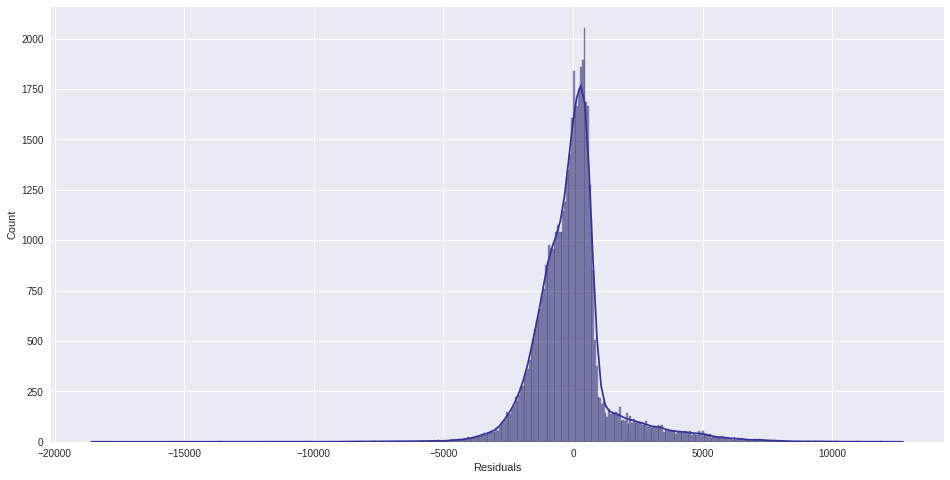

In [31]:
sns.histplot(x='Residuals',data=df_results,kde=True, color='#333399')
plt.show()

In [32]:
# check normality of residuals with  the rule of thumb
df_results['Residuals'].mean(), df_results['Residuals'].median(), df_results['Residuals'].skew(), df_results['Residuals'].kurt()

(-16.27379119902105, -23.414730851163313, 0.9766037410739562, 8.23324990010656)

In [33]:
# perform Anderson-Darling test for a normal distribution
p_value = normal_ad(df_results['Residuals'])[1]
alpha = 0.05

if p_value <= alpha:
    print('The residuals do not have a normal distribution, p-value:', p_value)
else:
    print('The residuals have a normal distribution, p-value:', p_value)

The residuals do not have a normal distribution, p-value: 0.0


The histogram, the rule of thumb and the Anderson-Darling test performed clearly indicate that the assumption of normality of the residuals is not met.
### Assumption 4. Homoskedasticity - equality of the variance of the residuals.
In order to confirm the homoskedasticity of the variance of the residuals, I will perform the Breusch-Pagan test, the null hypothesis of which assumes the existence of homoskedasticity, so if the p_value is lower than the alpha (0.05), it means that we must reject the null hypothesis, and thus homoskedasticity is absent.

In [34]:
fit = smf.ols('price ~ carat', data=data_frame).fit()
test_result = sms.het_breuschpagan(fit.resid, fit.model.exog)

In [35]:
names = ['Lagrange multiplier statistic', 'p-value','f-value', 'f p-value']
lzip(names,test_result)

[('Lagrange multiplier statistic', 9131.739622285566),
 ('p-value', 0.0),
 ('f-value', 10992.218536452361),
 ('f p-value', 0.0)]

In [36]:
alpha = 0.05
p_value = 0.0
if p_value <= alpha:
    print('No homoskedasticity of variance')
else:
    print('Homoskedasticity of variance')

No homoskedasticity of variance


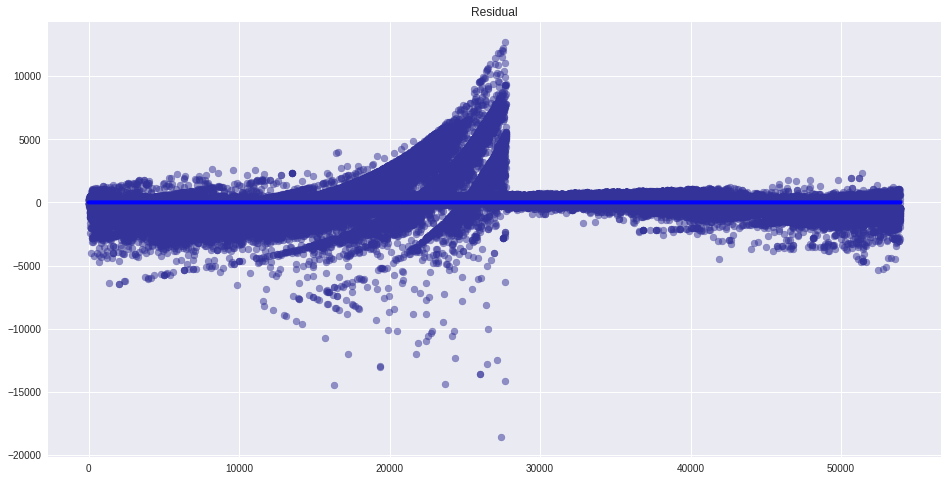

In [37]:
plt.scatter(x=df_results.index, y=df_results.Residuals, alpha=0.5, color='#333399')
plt.plot(np.repeat(0, df_results.index.max()), color='b', linewidth=4)
plt.title('Residual')
plt.show()

The result of the test rejected the null hypothesis and indicated that the variance of the residuals in my model is not equal. Also the scatterplot for the residuals confirms this - the distribiution is not uniform.

### Multiple Linear Regression Model 

In [38]:
data_frame.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.028234,0.181602,0.921591,0.975093,0.951721,0.953387
depth,0.028234,1.000000,-0.295798,-0.010630,-0.025289,-0.029340,0.094927
table,0.181602,-0.295798,1.000000,0.127118,0.195333,0.183750,0.150915
price,0.921591,-0.010630,0.127118,1.000000,0.884433,0.865419,0.861249
x,0.975093,-0.025289,0.195333,0.884433,1.000000,0.974701,0.970771
y,0.951721,-0.029340,0.183750,0.865419,0.974701,1.000000,0.952005
z,0.953387,0.094927,0.150915,0.861249,0.970771,0.952005,1.000000


I chose the variables carat, depth and z (depth in mm) because they have the highest correlation with the price variable, while they do not have a high correlation between them.  For this reason, I did not choose the X and Y variables.

In [39]:
# Step 1 - create a linear regression model for the variables price, carat, depth and z.

lin_X2 = data_frame[['carat', 'table', 'z']]
lin_y2 = data_frame[['price']] #target variable

model = LinearRegression()
model.fit(lin_X2, lin_y2)

LinearRegression()

In [40]:
#count a coefficient of determination
linear_r2 = model.score(lin_X2, lin_y2)
print('R^2: {0}'.format(linear_r2))

R^2: 0.8547078441993853


In [41]:
lin_y2_pred = model.predict(lin_X2)#predict

In [42]:
y, X = dmatrices('price ~ carat+table+z', data=data_frame, return_type='dataframe')

In [43]:
#calculate VIF coefficient
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns

In [44]:
vif

,VIF,variable
0,847.546094,Intercept
1,11.161115,carat
2,1.039936,table
3,11.044574,z


The VIF value helps determine whether a given predictor is not correlated with other predictors in the model. In my case for "carat" and "z" variables there is slight collinearity of predictors is present, we can consider changing the model.

In [45]:
#calculating The Mean Squared Error (MSE)
mse2 = sklearn.metrics.mean_squared_error(lin_y2, lin_y2_pred)

In [46]:
mse2

2312255.8220288525

The second model for multiple variables has a lower MSE error score which means it is a better model.